In [95]:
# Project explores a Dataframe of wine's review assigned to different wineries around the world
import numpy as np
import pandas as pd
import seaborn as sns

import missingno as msg

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

In [96]:
wine_df = pd.read_csv('wine.csv')
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


# DATA CLEANING

In [1]:
# drop duplicates: rows
wine_df.drop_duplicates(inplace=True)

NameError: name 'wine_df' is not defined

## MISSING DATA

In [ ]:
# Missing Data
import missingno as msng
msng.matrix(wine_df)

The column Unnamed:0 does't hold any relevant data, it will be removed without further investigation

In [99]:
wine_df.drop(['Unnamed: 0'], axis=1, inplace=True)

I will consider the relevance of the nan values in the whole dataframe, the missingno graph offers already enough visual understanding but the price columns could be analysed a little further

In [100]:
# considering nan values in df
tot_nan = wine_df.isnull().sum()
tot_nan

country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

##### Column PRICE is missing 57 entries . I don't want to delete 57 rows so I will subsitute the missing values with the mean.

#### Imputation 
preserves all cases by replacing missing data with an estimated value based on other available information.

There are three main problems that missing data causes: missing data can introduce a substantial amount of bias, make the handling and analysis of the data more arduous, and create reductions in efficiency.

In [122]:
# finding the mean of Price
mean_price = wine_df["price"].mean(0)
# replacing nan values with the mean
wine_df["price"].fillna(mean_price, inplace=True)

# check if operation was succesfull
tot_nan = wine_df.isnull().sum()
tot_nan

country          0
description      0
designation    269
points           0
price            0
province         0
region_1         0
region_2         0
variety          0
winery           0
dtype: int64

Price now present zero nan values, the operation was succesfull.

I didn't modified 'designation' just in case I will want to apply wordcloud to it.

### Considering region_1 and region_2  Columns

In [102]:
# explore relation between column 'region_1' and 'region_2'
filtering_by_nan = wine_df[wine_df['region_2'].isnull()] 
filtering_by_nan

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.00000,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.00000,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.00000,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Rom√°n,95,65.00000,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum √önico Crianza,95,110.00000,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
...,...,...,...,...,...,...,...,...,...,...
1091,France,This firm and dry wine is also full of acidity...,NaN,87,40.24283,Bordeaux,Pessac-L√©ognan,NaN,Bordeaux-style Red Blend,Ch√¢teau Manc√®dre
1092,France,"Fresh and juicy, this full-bodied while struct...",NaN,87,20.00000,Bordeaux,Bordeaux Sup√©rieur,NaN,Bordeaux-style Red Blend,Ch√¢teau Peyfaures
1093,US,This moderately aromatic wine conveys Red Hots...,Single Vineyard,87,23.00000,Idaho,NaN,NaN,Syrah,3 Horse Ranch Vineyards
1096,Italy,"A blend of 60% Vermentino and 40% Viognier, th...",Borgeri,87,24.00000,Tuscany,Bolgheri,NaN,White Blend,Giorgio Meletti Cavallari


##### Two approches could be taken in considerarion in this case:

1) Remove the whole columns of 'region_2' since the majority of the data are missing.(as the missigno graph revealed)

2) Filling the nan values with a replacement

#### Considerations:
Observing the regions columns and comparing them with the whole Dataframe , we noticed that 'region_2' exists only in combination with the 'US' countries. It doesn't seem to make much sense mentioning a region_2 reffering to other countries.
Also, once we have the Country and Procince Data, which seem to be fully completed, the role of the region become quite marginal.

I believe tha both approaches could be considered correct, but I chose to preserve the column 'region_2' anyway, just in case I will want to get back to the US part of data that region_2 mainly refer to.

##### Replace Nan values ( Region_1  &  Region_2 )

In [103]:
# replace nan values with unkown
wine_df["region_1"].fillna('unknown', inplace=True)
wine_df["region_2"].fillna('unknown', inplace=True)

# check if operation was succesfull
tot_nan = wine_df.isnull().sum()
tot_nan

country          0
description      0
designation    269
points           0
price            0
province         0
region_1         0
region_2         0
variety          0
winery           0
dtype: int64

## DATA INCONSISTENCY
Exploring occurences of Data Inconsistency:

In [104]:
wine_df.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

All good: none found

# *--  DATA ANALYSIS --                        *

# ____PRICE____

##### Avg Price of a bottle of wine

In [105]:
avg_price_bottle = wine_df['price'].mean()
avg_price_bottle

40.24282982791588

##### Max price

In [106]:
max_price = wine_df['price'].max()
max_price

500.0

In [107]:
# Data related to the bottle the cost the most
wine_df[wine_df['price']==500]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
898,Italy,"Aromas of crushed plum, asphalt, oak, toast, e...",Sor√¨ Tildin,92,500.0,Piedmont,Langhe,unknown,Red Blend,Gaja


#####  Min price

In [108]:
min_price = wine_df['price'].min()
min_price

7.0

In [109]:
# Data related to the cheapest bottles
wine_df[wine_df['price']==7]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
119,Portugal,"This broad, fruity wine brings out ripe berry ...",Convento da Vila,86,7.0,Alentejano,unknown,unknown,Portuguese Red,Adega Cooperativa de Borba
776,Portugal,"This is a herbal, earthy wine with as many tan...",D. Fuas Reserva,89,7.0,Terras do D√£o,unknown,unknown,Portuguese Red,Caves Velhas
932,Portugal,"This is a herbal, earthy wine with as many tan...",D. Fuas Reserva,89,7.0,Terras do D√£o,unknown,unknown,Portuguese Red,Caves Velhas
995,Portugal,"This is a dry sparkling wine with tannins, spi...",Plexus Tinto,85,7.0,Tejo,unknown,unknown,Alicante Bouschet,Adega Cooperativa do Cartaxo
1004,Portugal,This wine balances swathes of ripe berry fruit...,Cal Monte da Cal,85,7.0,Alentejano,unknown,unknown,Portuguese Red,Global Wines


## EDA
### First level of exploration about Price.
The __average values__ of a bottle of wine is __Price 40.24__ (we don't know the exact currency but we will assume all prices have been valued with the same one.

1. The __most expensive__ wine has a value of __Price 500__ and it has been produced in italy.
  > -> QUESTION REAISED FROM SUCH OBSERVATIONS:
   1.  Does Italy produce overall good high rated wine? Would be found within the top countries?
   1.  Does the winery Gaja produces other top quality wines?
   1.  Could we say the same for the Piedmont region and region Lamghe?
> 
2. The __cheapest wine__ was valued __Price 7__ and all the wines fell under Portughese country.
  1.   Portughese red and Alicante variety have a very low market values, what about their reviews? Will the points reflect also a low quality? Or the price doesn't reflect the quality of a wine?
>

__The following chapters will dive more into it__

# POINTS

##### Wine with Max points

In [110]:
max_points = wine_df['points'].max()
max_points

96

In [111]:
# Data related to the wine with the best points 
wine_df[wine_df['points']==96]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,unknown,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi


##### Wine with min points

In [112]:
min_points = wine_df['points'].min()
min_points

85

In [113]:
# Data related to the lowest points score
wine_df[wine_df['points']==85]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
725,US,"While light in color, this wine is flavorful a...",Salut√©,85,15.00000,California,Livermore Valley,Central Coast,Red Blend,Rubino Estates Winery
726,France,This pale ros√© blend of Cabernet Sauvignon an...,B√©lingard,85,9.00000,Southwest France,Bergerac Ros√©,unknown,Ros√©,Ch√¢teau B√©lingard
727,France,This is the second label from this Gaillac est...,Les Petits Cl√©ment Merlot Duras,85,16.00000,Southwest France,C√¥tes du Tarn,unknown,Red Blend,Ch√¢teau Cl√©ment Termes
728,US,A hint of maple syrup in the aromas and flavor...,NaN,85,15.00000,California,California,California Other,Cabernet Sauvignon,Jack's House
729,France,"A blend of 30% Pinot Noir and 70% Gamay, this ...",NaN,85,18.00000,Burgundy,Coteaux Bourguignons,unknown,Pinot Noir-Gamay,Joseph Drouhin
730,Italy,This informal red has a shy nose that eventual...,NaN,85,9.00000,Northeastern Italy,Delle Venezie,unknown,Pinot Nero,Famiglia Cielo
731,Portugal,This is a light wine with plenty of acidity an...,Oceanus Touriga Nacional-Cabernet Sauvignon,85,11.00000,Tejo,unknown,unknown,Portuguese Red,Fiuza
732,France,A light orange pink color sets the scene for a...,Pigmentum Malbec,85,12.00000,Southwest France,C√¥tes du Lot,unknown,Ros√©,Georges Vigouroux
733,France,Named after the series of vineyard terraces th...,Les Terrasses,85,14.00000,Southwest France,Cahors,unknown,Malbec,Rigal
734,South Africa,"Fresh grass, gooseberry, lime leaf and a touch...",NaN,85,10.00000,Western Cape,unknown,unknown,Sauvignon Blanc,Long Neck


##### AVg points assigned to wine

In [24]:
avg_points = wine_df['points'].mean()
avg_points

89.70172257479601

## EDA
### First level of exploration about Points

The __highest points__ were assigned to wines originating from __'US' and 'Spain'__.  We observ that we don't find in the top rated the wines the price 500, assigned previously to Italy.

The __lowest points__ actually have a vast range of wines, from a vast range of countries, included Italy, US and Spain, which were producing also top wine, as the previous exploration revealed.

The __average points__ of a bottle is wine are around __Price 89.7__ (only 4 points above the minimum 85)

--> __Price and Points will be compared later to verify if the price of a wine is always justified in the marked.__


### Country that prodce on avg the wine with best highest points

In [25]:
# grouping df by Country
country_df = wine_df.groupby('country').mean(numeric_only=True)
country_df = country_df.sort_values( by='points', ascending=False)

Text(0, 0.5, 'POINTS')

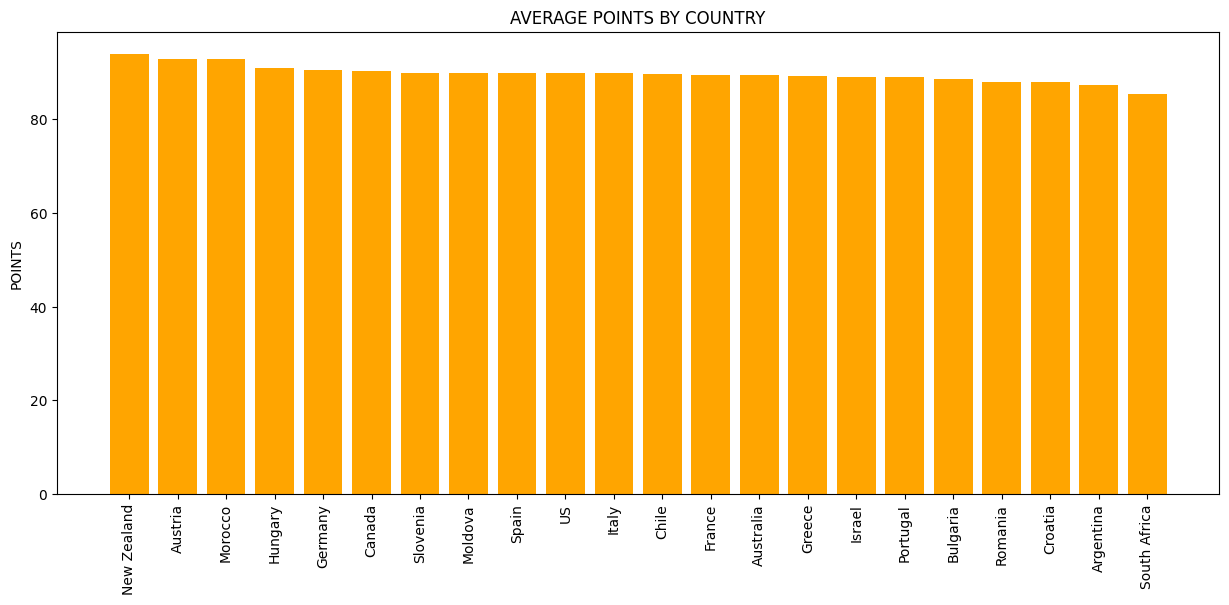

In [26]:
# plot
fig, ax = plt.subplots(figsize=(15,6))
plt.bar( country_df.index, country_df['points'] , color='orange' )
plt.xticks( rotation=90)

# labelling
ax.set_xticks( country_df.index , rotation='vertical')
ax.set_title('AVERAGE POINTS BY COUNTRY')
ax.set_ylabel('POINTS')

### Province that produce on avg wine with best highest points

In [63]:
# PROVINCE
province_df = wine_df.groupby('province').mean(numeric_only=True)
province_df = province_df.sort_values( by='points', ascending=False)

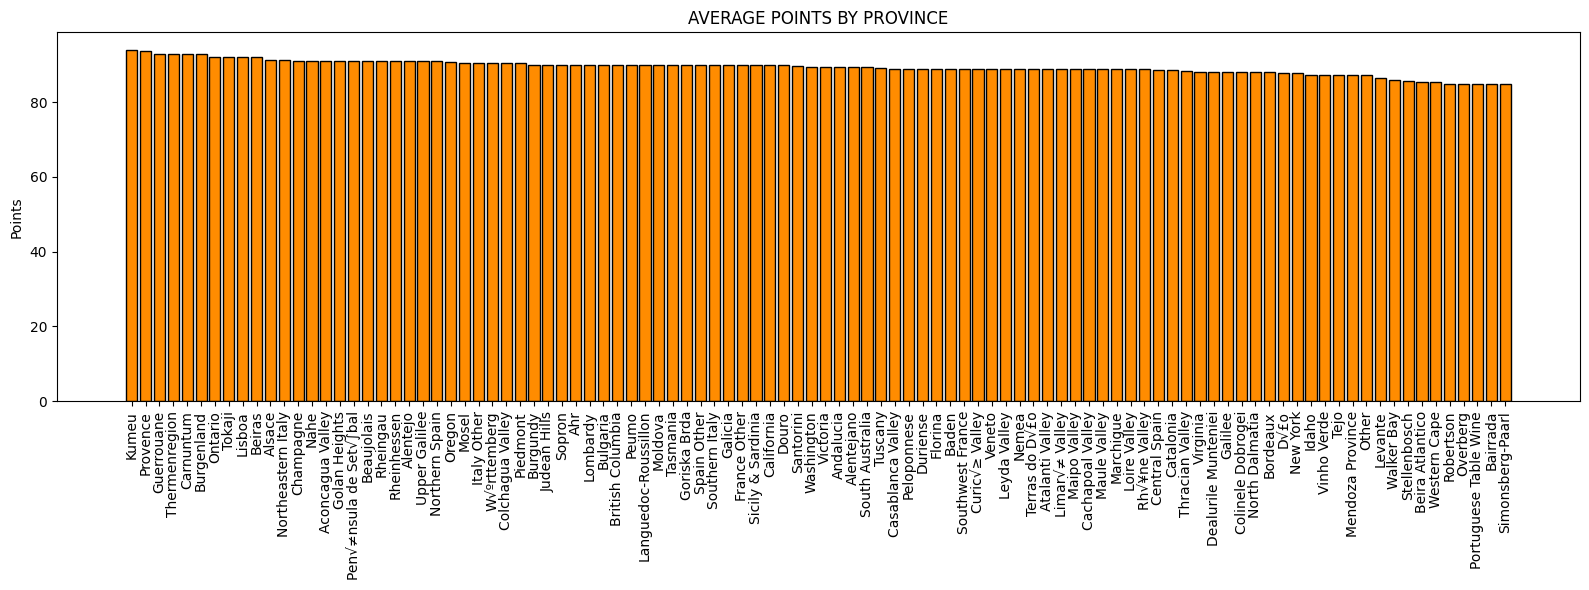

In [121]:
# plot
fig = plt.figure(figsize=(16,6))
plt.bar( province_df.index, province_df['points'] , color='darkorange', linewidth=1, edgecolor='black' )
plt.xticks( rotation=90)
# labelling
plt.title('AVERAGE POINTS BY PROVINCE')
plt.ylabel('Points')

fig.tight_layout()

# POINTS VS PRICE

#### Dataframe re-arranged grouping by countries 

In [129]:
# checking if all entries have been inserted correctly: Data Inconstistecy
wine_df['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia'],
      dtype=object)

All good

In [128]:
# grouping by country
countries = wine_df.groupby('country').mean(numeric_only=True)
countries

,points,price
country,,
Argentina,87.280000,21.360000
Australia,89.500000,42.166667
Austria,93.000000,26.310707
Bulgaria,88.600000,17.600000
Canada,90.400000,33.600000
Chile,89.761905,35.714286
Croatia,88.000000,23.000000
France,89.563953,36.231391
Germany,90.518519,27.777778


In [125]:
# reveling N° of countries
countries = countries.shape[0]
countries

22

##### Correlations between Price and Points

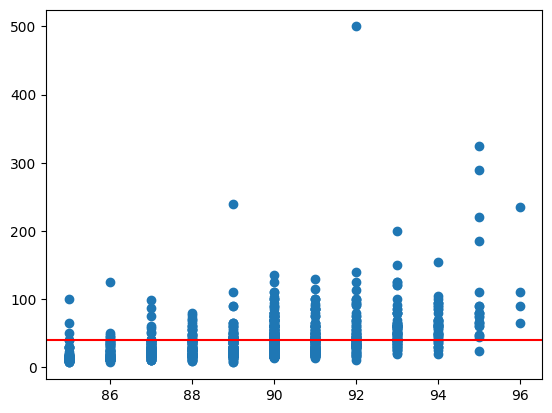

In [131]:
# data
price = wine_df['price']
points = wine_df['points']
# plot
plt.scatter( points, price )
# plot average price as a red line
plt.axhline(y= avg_price_bottle   , color='r', linestyle='-')

##### Observation:
As price cross the 93 points some wines raise the price, with one exception where a winery produced a wine for 500 $ with 92 as score.

Having 96 as score is rare, only 4 wines achieved it.

Generally speaking there is a very weak correlation between Price and Points, it is not a direct correlation but in some cases, the high Price of a products wants to justify the score above the average.

##### Correlation between Price and Points: DATAFRAME

In [133]:
correlation = wine_df.groupby('price').mean(numeric_only=True)
correlation
correlation[correlation['points']>93]

,points
price,
66.0,93.5
73.0,95.0
79.0,95.0
105.0,94.0
155.0,94.0
185.0,95.0
220.0,95.0
235.0,96.0
290.0,95.0


#### Points Distribution

Text(0.5, 0, 'Points')

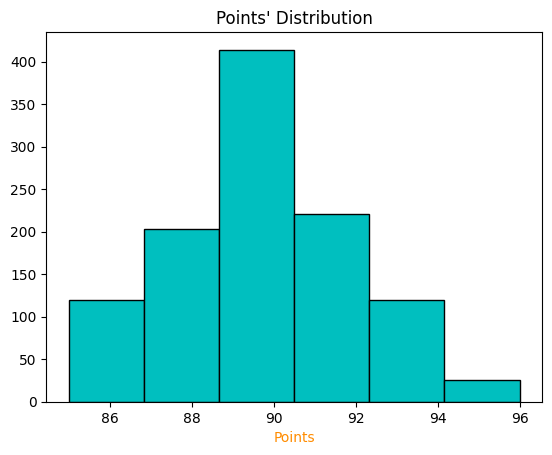

In [31]:
points = wine_df['points']
plt.hist(points, bins=6, color='c', edgecolor='black')
# labelling
plt.title('Points\' Distribution')
plt.xlabel('Points', color='darkorange')

##### Price distribution

Text(0.5, 1.0, 'Histogram of Price Distribution')

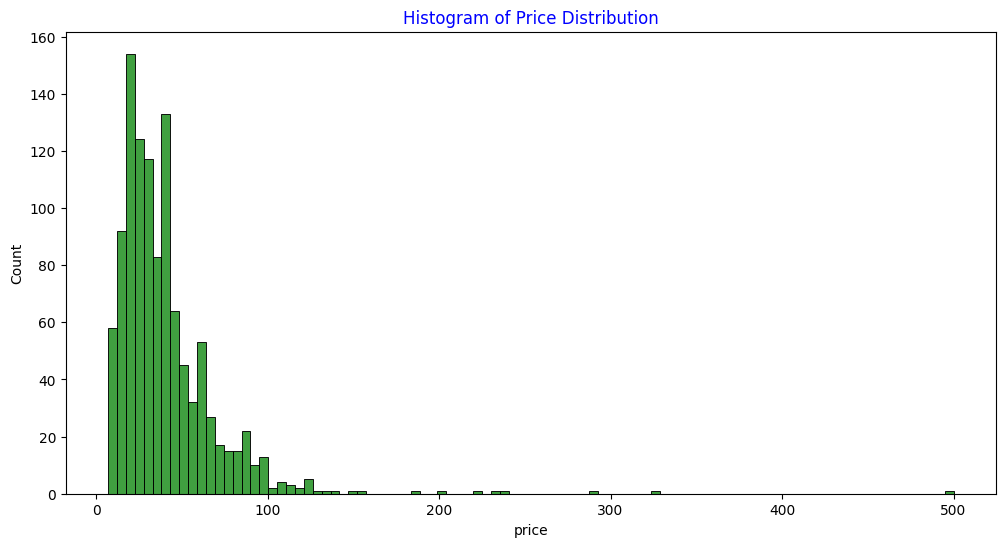

In [91]:
# size of the graph frame
fig = plt.figure(figsize=(12, 6))
# plot
price = wine_df['price']
sns.histplot(price, color='green')
# labelling
plt.title("Histogram of Price Distribution", color='blue')

## Interpretation of Points
According to :
https://www.winespectator.com/articles/scoring-scale
Wine points could be read through such scale:
__Wine Spectator's 100-Point Scale__

90-94 Outstanding: a wine of superior character and style.

85-89 Very good: a wine with special qualities.

80-84 Good: a solid, well-made wine.

75-79 Mediocre: a drinkable wine that may have minor flaws.

50-74 Not recommended.

Text(0.5, 1.0, 'COUNT OCCURRENCIES FILTERING BY POINTS SCALE')

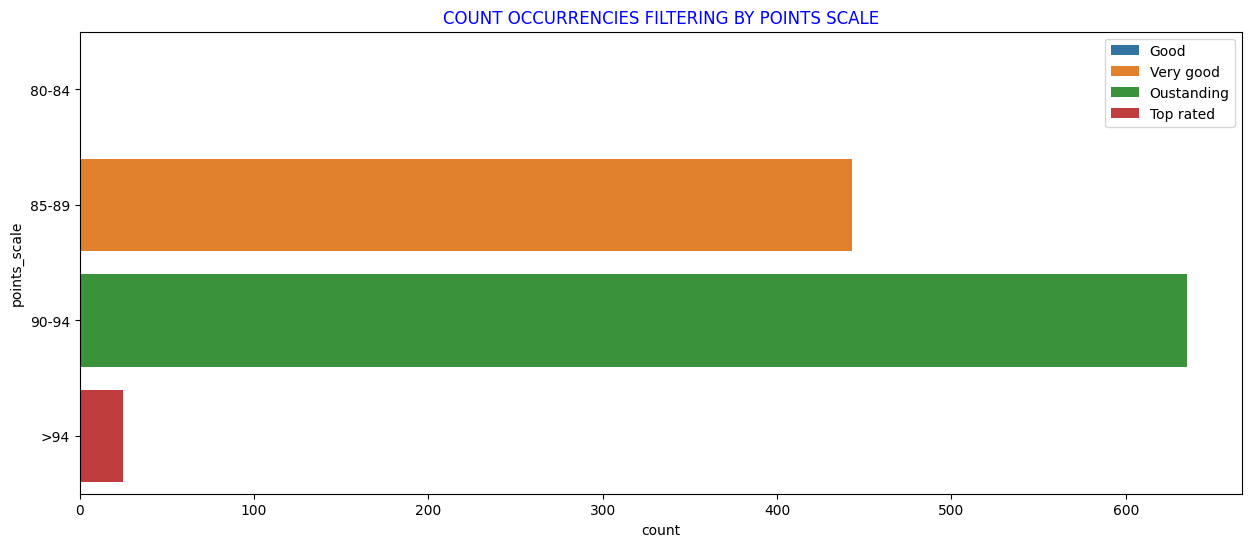

In [205]:
# min points we encounter in our dataframe are 85, there are not 'not reccommended' or 'mediocre' wines.
# The comparison starts with  'Very good' and 'Outstanding' wines
# DATA: SCALE
wine_df['points_scale'] = pd.cut(wine_df['points'], [ 79, 84, 89, 94, 96 ], 
                   labels=[ '80-84','85-89','90-94', '>94'])
# plot
fig = plt.figure(figsize=(15,6))
labels=['Good', 'Very good', 'Oustanding', 'Top rated']
sns.countplot(y=wine_df['points_scale'], data= wine_df , label= labels   )

plt.legend( labels )
plt.title('COUNT OCCURRENCIES FILTERING BY POINTS SCALE', color='blue')

The majority of our observation falls in the cathegory of 'Outstanding wines'. 

So I created a further cathegory that select the niche, the top of the top products.
>

#### Revealing best wines above 90 score

In [202]:
best_wines = wine_df[wine_df['points']>90]
best_wines = best_wines.groupby('country').mean(numeric_only=True)
# 366 rows = 366 wine above 90
best_wines.sort_values(by='points')
best_wines

,points,price
country,,
Argentina,92.250000,36.250000
Australia,91.000000,36.000000
Austria,93.000000,26.310707
Canada,92.000000,17.000000
Chile,91.500000,65.000000
France,92.421053,52.643856
Germany,91.000000,25.812500
Hungary,92.000000,16.000000
Israel,91.000000,32.500000


#### Revealing best wines above 94 score

In [201]:
best_wines = wine_df[wine_df['points']>94]
best_wines = best_wines.groupby('country').mean(numeric_only=True)
# 366 rows = 366 wine above 90
best_wines.sort_values(by='points')
best_wines

,points,price
country,,
France,95.000000,148.666667
Italy,95.000000,80.000000
Spain,95.142857,105.285714
US,95.214286,101.071429


In [197]:
best_wines = wine_df[wine_df['points']>94]
best_wines

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_scale
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,>94
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,unknown,Tinta de Toro,Bodega Carmen Rodr√≠guez,>94
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,>94
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,>94
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,unknown,Provence red blend,Domaine de la B√©gude,>94
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,unknown,Tinta de Toro,Numanthia,>94
6,Spain,Slightly gritty black-fruit aromas include a s...,San Rom√°n,95,65.0,Northern Spain,Toro,unknown,Tinta de Toro,Maurodos,>94
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum √önico Crianza,95,110.0,Northern Spain,Toro,unknown,Tinta de Toro,Bodega Carmen Rodr√≠guez,>94
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergstr√∂m,>94
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,>94


With the Dataframe __Revealing best wines above 90 score__ we discover that the majority of our coutries reach Outstanding performances with their production.
On the bottom position, excluded from outstanding results we found:

__expensive :__

Slovenia

__average price :__

Moldova

Croatia

__cheap :__

Greece

South Africa

Bulgaria

Romania


It seems that __Slovenia__ overcharge their wine or the cost of production spike the prices of their wine, many more countries compete with cheaper prices for the similar quality.


In [208]:
# showing occurences of one of the minor producers
new_zealand = wine_df[wine_df['country']=='New Zealand']
new_zealand

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_scale
25,New Zealand,"Yields were down in 2015, but intensity is up,...",Mat√©'s Vineyard,94,57.0,Kumeu,unknown,unknown,Chardonnay,Kumeu River,90-94
305,New Zealand,"Yields were down in 2015, but intensity is up,...",Mat√©'s Vineyard,94,57.0,Kumeu,unknown,unknown,Chardonnay,Kumeu River,90-94


#### Graph observation:
This graph __'Reviws by country'__ is quite an important one, as it shows the huge disparity between countries.
It becomes really difficult to compare countries that have very few reviews, against the ones which got disproportionately more.

We can easily compare France with Italy, extending even to Portugal and Spain,but compare them with the rest of the countries, it become quite difficult.

#### Avg Price by Country

Text(0, 0.5, 'POINTS')

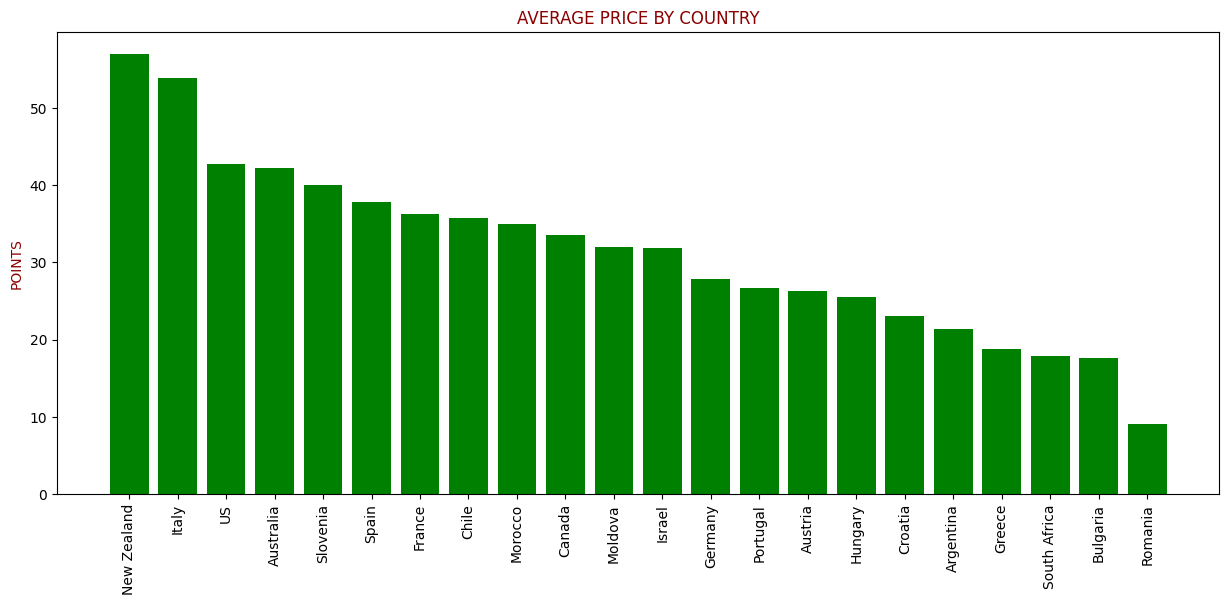

In [34]:
#country_df = wine_df.groupby('country').mean(numeric_only=True)
price_df = country_df.sort_values( by='price', ascending=False)

# plot
fig, ax = plt.subplots(figsize=(15,6))
plt.bar( price_df.index, price_df['price'] , color='green' )
plt.xticks( rotation=90)

# labelling
ax.set_xticks( price_df.index , rotation='vertical')
ax.set_title('AVERAGE PRICE BY COUNTRY', color='darkred')
ax.set_ylabel('POINTS', color='darkred')

#### compare avg price vs avg points

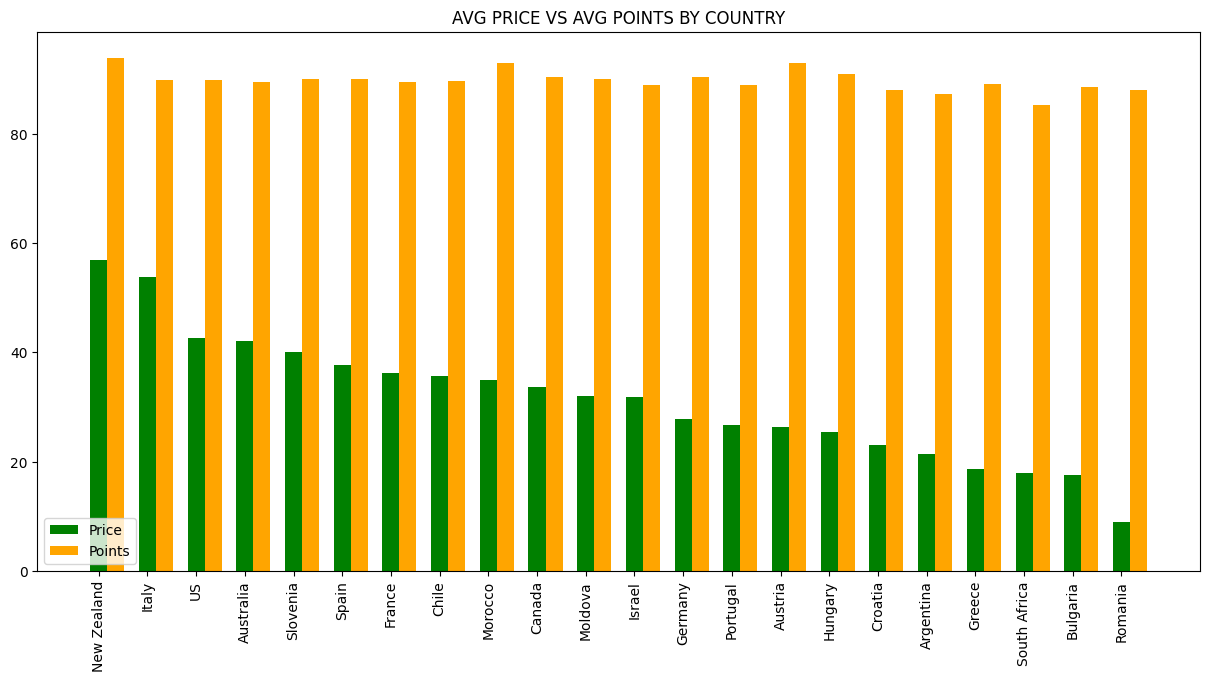

In [165]:
#country_df =  wine_df.groupby('country').mean(numeric_only=True)
# country_df = country_df.sort_values( by='points', ascending=False)

#price_df  = country_df.sort_values( by='price', ascending=False)

# create data
x = np.arange(22)  # 22 countries = 22 bars
width = 0.35
# plot
fig, ax = plt.subplots(figsize=(15,7))
price_bar = ax.bar( x,       price_df['price'] ,  color='green' ,  width=0.35, label='Price', 
                   tick_label= list(price_df.index)  )

points_bar = ax.bar(x+0.35,  price_df['points'] , color='orange' , width=0.35, label='Points')
# labelling
ax.set_xticks(x, list(price_df.index),   rotation='vertical')
ax.set_title('AVG PRICE VS AVG POINTS BY COUNTRY')
ax.legend(loc='lower left')

#### Nunmber of Reviews by Country

Text(0.5, 1.0, 'NUMBER OF REVIEWS BY COUNTRY')

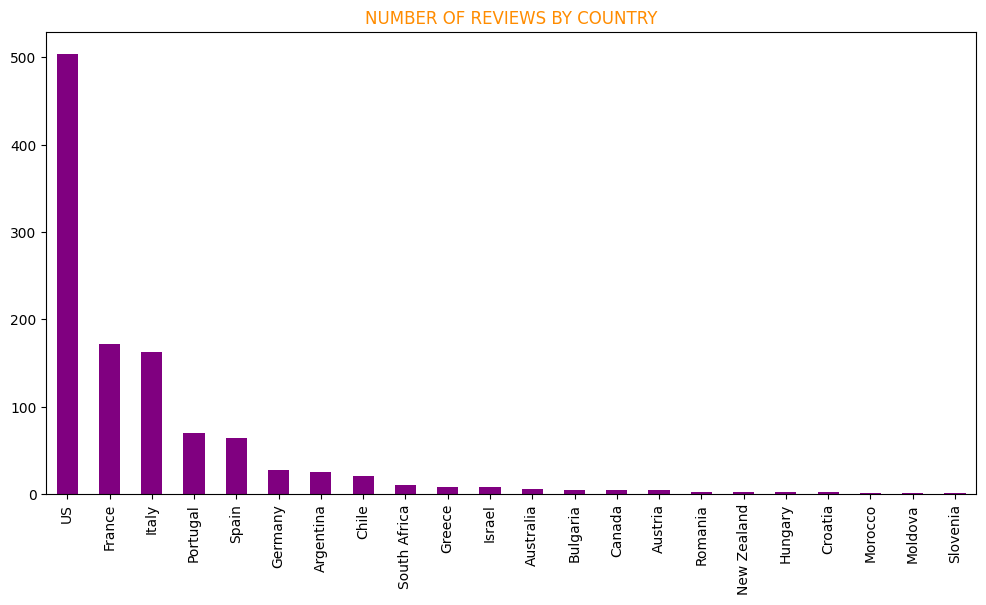

In [207]:
wine_df.country.value_counts().nlargest(22).plot(kind='bar', figsize=(12,6), color='purple')
#labelling
plt.title('NUMBER OF REVIEWS BY COUNTRY', color='darkorange')

## EDA
### First conclusion 
### MINOR WINE PRODUCERS 
__New Zeland, Morocco and Austria__ might be less known but they produce excellent wines, although they prefer to bet on quality rather than quantity. It might be also a forced consequence of the soil and wheater that these countries face, which might not put in optimal condition mass cultivation of grapes.

__New Zeland__ place itself on first place for average review points, with a __score of 94__, but comes with also the highest average price.

__Morocco__ owns an excellent score of avg __93 points__, with modest price.

__Austria__ is very similar to Morocco, gaining __93 avg points__ and the __cheapest__ price offered for such quality.


### MAJOR WINE PRODUCERS

The main producers of wine are : Us, Italy, France, Spain and Portugal.
All of them received quite __similar score__, around __89.8__ which doesn't determine any gerarchy in term of quality of the production.

__Italy__ holds the first place among them for the most expensive offer.

We then have __US__,
then __Spain and France__, with very similar Price.
__Portugal__ is the cheapest option.



### TOP PERFORMANCE
Considering only the countries that reached top performances, above __93 Points__,  they are all very similar. These countries were able to creates products which went beyond expenctation of excellence.

When it comes to Prices, here is the ranking

France : Price 148.66

Spain  : Price 105

US     : Price 101

Italy  : Price80

### WORSE RESULTS

__expensive :__

Slovenia

__average price :__

Moldova

Croatia

__cheap :__

Greece

South Africa

Bulgaria

Romania



>

# VARIETY

#### Most common wine

Text(0.5, 1.0, 'Top Most common produced Wines')

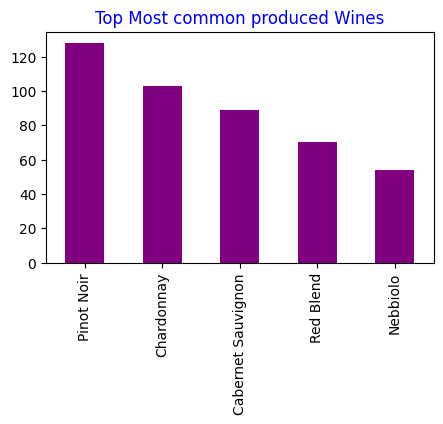

In [124]:
# what is the most common wine in the world / dataset?
most_common = wine_df.variety.value_counts().nlargest(5).plot(kind='bar', figsize=(5,3), color='purple')
#labelling
plt.title('Top Most common produced Wines', color='blue')

#### Most common wine : grouping by variety

In [125]:
by_variety = wine_df.groupby('variety').mean(numeric_only=True)
points_by_variety =  by_variety.sort_values(by='points', ascending=False)
points_by_variety 

,points,price
variety,,
Tannat,95.000000,90.000000
Friulano,94.500000,57.500000
Tinta de Toro,94.166667,101.333333
Provence red blend,94.000000,47.500000
Tannat-Cabernet,93.666667,46.666667
...,...,...
Aglianico,86.000000,34.000000
Malbec-Cabernet Sauvignon,86.000000,39.000000
Pinot Noir-Gamay,85.000000,18.000000


#### Compare variety with Points : Best results

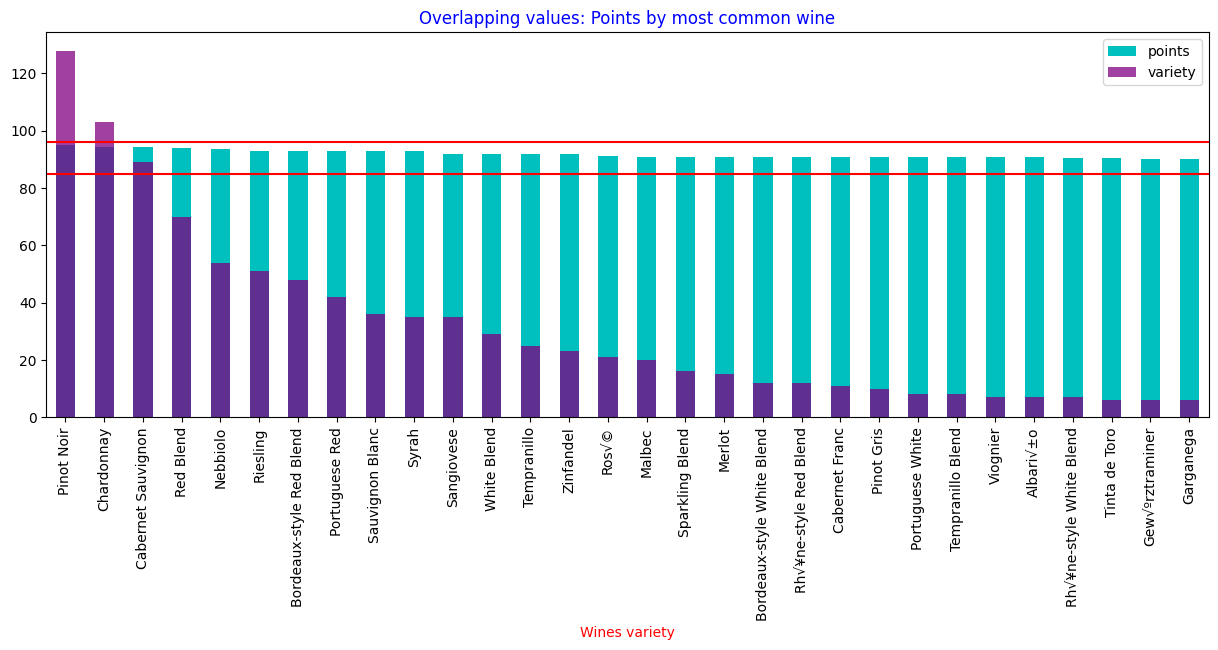

In [126]:
points_by_variety.points.plot(kind='bar', figsize=(10,15), color='c')
most_common = wine_df.variety.value_counts().nlargest(30).plot(kind='bar', figsize=(15,5),
                                                               color='purple', alpha=0.75)
# Plot lines : max and min values of Points
plt.axhline(y=max_points, color='r', linestyle='-')
plt.axhline(y=min_points, color='r', linestyle='-')
# labellinf
plt.xlabel('Wines variety', color='red')
plt.title('Overlapping values: Points by most common wine', color='blue')
plt.legend()

#### Compare variety with Points : Worse results

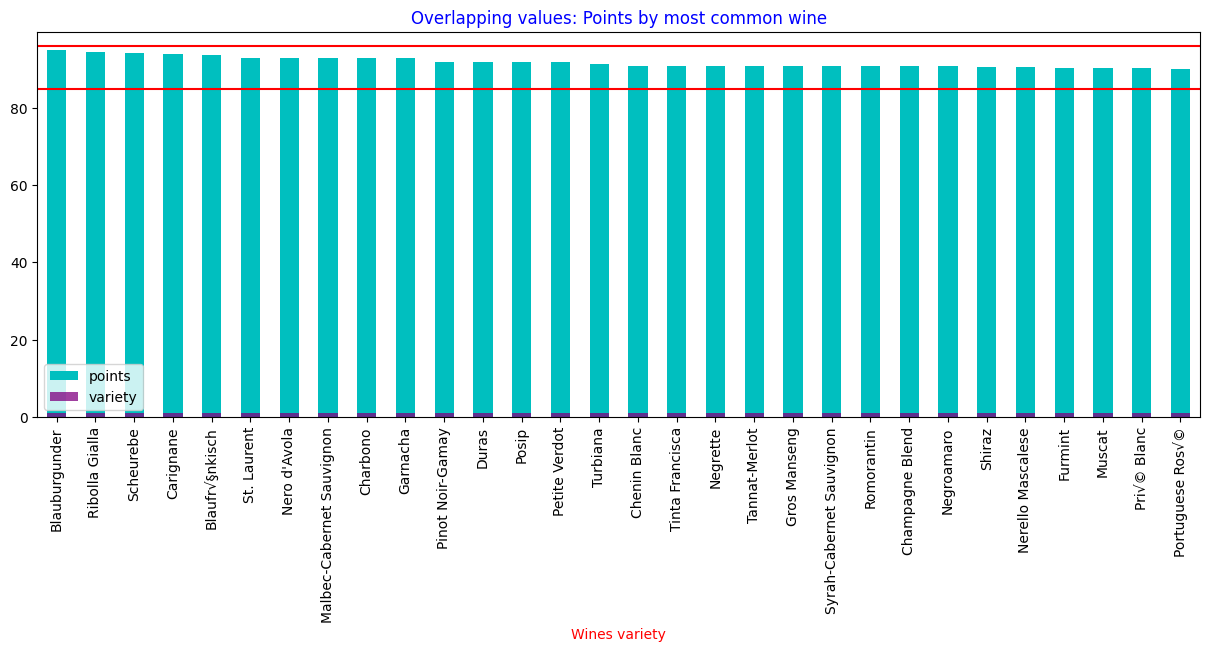

In [127]:
points_by_variety.points.plot(kind='bar', figsize=(10,15), color='c')
most_common = wine_df.variety.value_counts().nsmallest(30).plot(kind='bar', figsize=(15,5),
                                                               color='purple', alpha=0.75)
# Plot lines : max and min values of Points
plt.axhline(y=max_points, color='r', linestyle='-')
plt.axhline(y=min_points, color='r', linestyle='-')
# labellinf
plt.xlabel('Wines variety', color='red')
plt.title('Overlapping values: Points by most common wine', color='blue')
plt.legend()

# TEXT ANALYSIS

### WHAT REVIEWER LOOK INTO THE MOST RATED WINES ?

<function matplotlib.pyplot.show(close=None, block=None)>

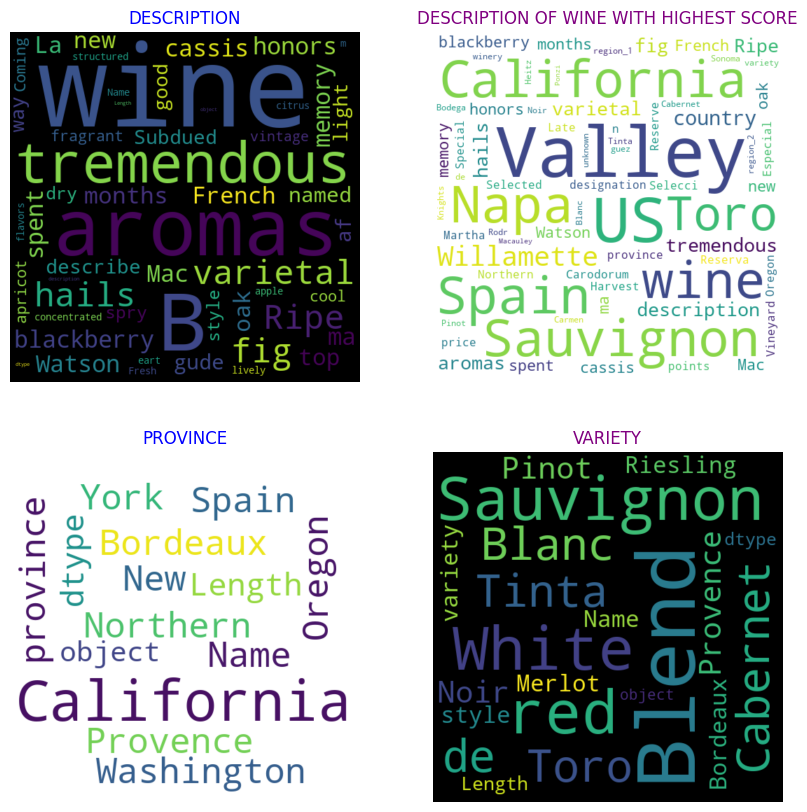

In [137]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
# ---------------------------------------------- TEXT 1 : DESCRIPTION COLUMN
# link text
text = wine_df['description']
# generate text
wordcloud = WordCloud(width = 500, height = 500, margin=10).generate(str(text))

# plot
ax[0,0].imshow(wordcloud, interpolation = 'bilinear')
ax[0,0].axis('off')
ax[0,0].margins(x=0, y=0)
# labelling
ax[0,0].set_title('DESCRIPTION', color='blue')
plt.show
# ---------------------------------------------- TEXT 2: DESCRIPTION OF HIGHEST SCORE WINE
#wine_df[wine_df['points']==96]
# link text
text2 = wine_df[wine_df['points']==96] 

# generate text
#wordcloud = WordCloud(width = 500, height = 500, margin=10).generate(str(text))

wordcloud = WordCloud(background_color='white',
                      max_font_size = 100,
                      collocations=False,
                      width = 500, height = 500, margin=10).generate(str(text2))

# plot
ax[0,1].imshow(wordcloud, interpolation = 'bilinear')
ax[0,1].axis('off')
ax[0,1].margins(x=0, y=0)
# labelling
ax[0,1].set_title('DESCRIPTION OF WINE WITH HIGHEST SCORE', color='purple')
plt.show
# ---------------------------------------------- TEXT 3: PROVINCE
#wine_df[wine_df['points']==96]
# link text
text3 = wine_df['province']

# generate text
#wordcloud = WordCloud(width = 500, height = 500, margin=10).generate(str(text))

wordcloud = WordCloud(background_color='white',
                      max_font_size = 100,
                      collocations=False,
                      width = 500, height = 500, margin=10).generate(str(text3))

# plot
ax[1,0].imshow(wordcloud, interpolation = 'bilinear')
ax[1,0].axis('off')
ax[1,0].margins(x=0, y=0)
# labelling
ax[1,0].set_title('PROVINCE', color='blue')
plt.show
# ---------------------------------------------- TEXT 4: VARIETY
# link text
text = wine_df['variety']
# generate text
wordcloud = WordCloud(width = 500, height = 500, margin=10).generate(str(text))
# plot
ax[1,1].imshow(wordcloud, interpolation = 'bilinear')
ax[1,1].axis('off')
ax[1,1].margins(x=0, y=0)
# labelling
ax[1,1].set_title('VARIETY', color='purple')
plt.show


Reviews look into wine definetely at their __Aromas__ and seem to appreciate particularly the __fruity__ ones, keening on figs and blackberry.  

Theu also take in consoderation and like to mention the months of work put into the products.

When aprecciated a wine is mentioned as __tremensous__, it's is a good indication of a good review.


__California__ stands out from all the procences and surprisingly Spain was mentioned often, but not necessarily with good mentioning.

Of particular interest was the Sauvignon varity. We found the __Caubernet Sauvignon__ between the most appreciated and produced wine around the world, but it was mentioned often also the __Blanc__
, which is  a green-skinned grape variety that originates from the Bordeaux region of France.


>
# CONCLUSION 
From this brief study we conclude that the mass producer of wine are __US, France, Italy, Spain and Portugal__. Regarding performance all of them shine a part for Portufal.
Some wines justify the price according to the reviews, and the points assigned, some other dont't.pus 
Price is not directly correlated woth the Score. Cost of production should be considered too.

California was mentioned numerous times, and fruity aromas were the most appreciated.

Other countries achieved remarkanle result but the production of wine cannot compete with the countries listed above.